In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import random

# Grid setup
GRID_SIZE = 5
GOLD = (2, 2)
# GOLD = (4, 4)
# TRAPS = [(2, 3), (3, 2), (2, 2)]
# TRAPS = [(1,0),(1,1),(1,2),(1,3), (3,1), (3,2), (3,3), (3,4)]
TRAPS = [(1,2), (2,1), (2,3), (3,2)]
# Accions possibles: amunt, avall , esquerra, dreta
ACTIONS = [(-1,0), (1,0), (0,-1), (0,1)]

In [83]:
# Recompenses
def get_reward(state):
    if state == GOLD:
        return 1
    elif state in TRAPS:
        return -1
    else:
        return -0.01  # petita penalització per afavorir camins curts

def valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if valid_state(new_state):
        return new_state
    return state

In [84]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 500

In [85]:
# Entrenament
for _ in range(episodes):
    state = (0, 0)
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            Q[state] = np.zeros(len(ACTIONS))
        if random.random() < epsilon:
            action_idx = random.randint(0, len(ACTIONS) - 1)
        else:
            action_idx = np.argmax(Q[state])
        action = ACTIONS[action_idx]
        new_state = step(state, action)
        reward = get_reward(new_state)
        if new_state not in Q:
            Q[new_state] = np.zeros(len(ACTIONS))
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
        state = new_state

In [86]:
# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
    path = [start]
    state = start
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            break
        action = ACTIONS[np.argmax(Q[state])]
        next_state = step(state, action)
        if next_state == state or next_state in path:
            break  # avoid loops
        path.append(next_state)
        state = next_state
    return path

trajectory = get_best_trajectory()

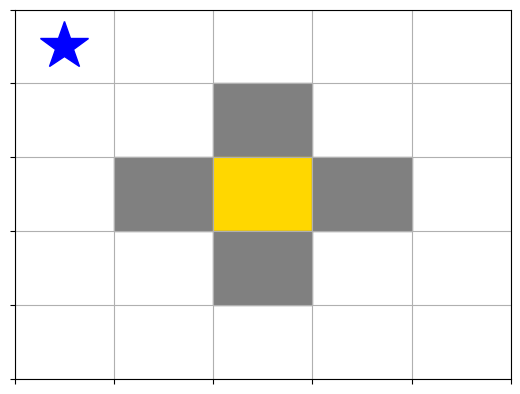

In [87]:
# Animació

fig, ax = plt.subplots()

def draw_grid(agent_pos):
    ax.clear()
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)

    # Cel.les
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            y = GRID_SIZE - 1 - i
            if (i, j) == GOLD:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gold'))
            elif (i, j) in TRAPS:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gray'))

    # Agent
    y = GRID_SIZE - 1 - agent_pos[0]
    x = agent_pos[1]
    ax.plot(x, y, 'b*', markersize=36)

def update(frame):
    draw_grid(trajectory[frame])

anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=700)
HTML(anim.to_jshtml())


  1. Executa el codi del cas pràctic enllaçat des dels apunts i modifica'l perquè mostri la trajectòria que ha après l'agent. Quantes de moviments necessita per arribar a l'objectiu?

  Per arribar a l'objectiu necessita 8 moviments

  2. Canvia els obstacles perquè la trajectòria apresa per l'agent sigui la següent: ((0,0),(1,0),(2,0),(3,0),(4,0),(4,1),(4,2),(3,2),(2,2),(1,2),(0,2),(0,3),(0,4),(1,4),(2,4),(3,4),(4,4))

  ```
  TRAPS = [(1,0),(1,1),(1,2),(1,3), (3,1), (3,2), (3,3), (3,4)]
  ```

  3. Redueix el nombre d'epochs d'aprenentatge. A partir de quin valor l'agent sol aprendre a resoldre el problema?

  Tècnicament comença a funcionar entorn als 100 epochs, pero no és capaç de finalitzar-lo. Per finalitzar-lo necessita uns 200-250

  4. Defineix un problema en què sigui impossible arribar a l'objectiu. Quina política aprèn l'agent en aquest cas?

  Un problema que fos impossible de resoldre podria ser perfectament un objectiu que estàs envoltat de obstacles

  El que ha passat es basicament que al primer moviment atura el aprenentatge perquè "dona per fet" que el objectiu és inasumible.

  5. Obtén un codi com el del cas pràctic a través d'enginyeria de prompting. Quantes iteracions has necessitat? Has hagut de retocar el codi finalment a mà? Copia el teu codi a una cel·la del quadern i dona també la URL del teu diàleg sobre l'eina que hagis emprat.



Prompt 5

Prompt
Hola! Quiero hacer un pequeño script para aprendizaje por refuerzo.
Lo que hay que ver es un agente resolviendo el camino hasta el punto final dado esquivando obstaculos en una rejilla:
* Medida de la rejilla pe: 5x5
* Obstaculos dados por coordenadas, pe: [(2, 3), (3, 2), (2, 2)]
* Comienzo siempre en 0,0
* Meta dada en forma de coordenada, p.e: (4,4)
* Movimientos válidos dados también [(-1,0), (1,0), (0,-1), (0,1)] (arriba, abajo, izda, derecha)
* El objeto que se mueve será una cruz, los obstaculos se pintarán en gris y la meta en amarillo
Todo esto lo tienes que hacer usando python y las teorias de aprendizaje por refuerzo

### Resposta

Voy a crear un script de aprendizaje por refuerzo para resolver un problema de navegación en una rejilla como has descrito. Primero implementaré el entorno y luego el algoritmo de Q-learning para que el agente aprenda a llegar al objetivo evitando obstáculos.

He creado un script completo de aprendizaje por refuerzo para resolver el problema de navegación en rejilla que has descrito. El código implementa:

1. Un entorno `GridWorld` con:
   - Rejilla personalizable (por defecto 5x5)
   - Obstáculos en coordenadas específicas
   - Punto de inicio (0,0) y meta configurable
   - Movimientos válidos en las cuatro direcciones

2. Un agente Q-Learning que:
   - Aprende a través de exploración y explotación (política ε-greedy)
   - Actualiza una tabla Q con los valores de cada par estado-acción
   - Reduce gradualmente la exploración a medida que aprende

3. Visualización con:
   - Representación gráfica de la rejilla, obstáculos y meta
   - El agente representado como una cruz
   - Animación del camino óptimo una vez entrenado

El algoritmo de aprendizaje por refuerzo utiliza los conceptos fundamentales:

- **Estados**: Coordenadas en la rejilla (x,y)
- **Acciones**: Movimientos en 4 direcciones
- **Recompensas**: Positivas al llegar a la meta, negativas por movimientos inválidos
- **Política**: El agente aprende qué acción tomar en cada estado para maximizar la recompensa

Puedes ajustar parámetros como:
- Tamaño de la rejilla (`grid_size`)
- Posición de obstáculos (`obstacles`)
- Ubicación de la meta (`goal`)
- Parámetros de aprendizaje (tasa de aprendizaje, factor de descuento, exploración)

¿Te gustaría que explique alguna parte específica del código con más detalle o que haga alguna modificación?

[Claude artifact](https://claude.site/artifacts/26817623-2773-4fd0-a152-8eede48e347e)

Acción: Abajo, Recompensa: 10.00


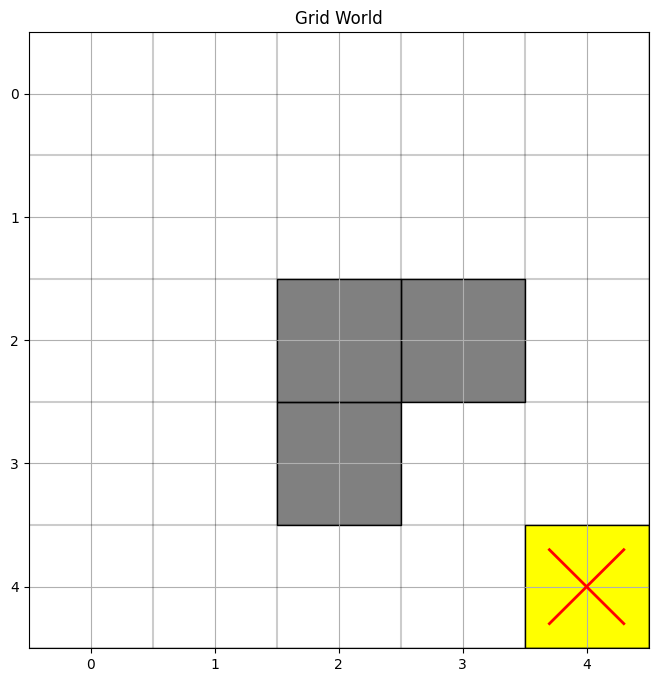

Camino óptimo encontrado con recompensa total: 9.30
Longitud del camino: 9


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import random
from IPython.display import clear_output
import time

class GridWorld:
    def __init__(self, grid_size=(5, 5), obstacles=[(2, 3), (3, 2), (2, 2)], start=(0, 0), goal=(4, 4)):
        self.grid_size = grid_size
        self.obstacles = obstacles
        self.start = start
        self.goal = goal
        self.current_state = start
        self.actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # arriba, abajo, izquierda, derecha
        self.action_names = ["Arriba", "Abajo", "Izquierda", "Derecha"]
        self.grid = np.zeros(grid_size)

        # Marcar obstáculos en la rejilla
        for obstacle in self.obstacles:
            self.grid[obstacle] = -1

        # Marcar la meta
        self.grid[self.goal] = 2

    def reset(self):
        self.current_state = self.start
        return self.current_state

    def step(self, action_idx):
        action = self.actions[action_idx]
        next_state = (self.current_state[0] + action[0], self.current_state[1] + action[1])

        # Comprobar si el movimiento es válido
        if (next_state[0] < 0 or next_state[0] >= self.grid_size[0] or
            next_state[1] < 0 or next_state[1] >= self.grid_size[1] or
            next_state in self.obstacles):
            reward = -1  # Penalización por movimiento inválido
            next_state = self.current_state  # No se mueve
            done = False
        elif next_state == self.goal:
            reward = 10  # Recompensa por llegar a la meta
            done = True
        else:
            reward = -0.1  # Pequeña penalización por cada paso para fomentar caminos cortos
            done = False

        self.current_state = next_state
        return next_state, reward, done

    def render(self, q_table=None, show_values=False):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-0.5, self.grid_size[1] - 0.5)
        ax.set_ylim(-0.5, self.grid_size[0] - 0.5)

        # Dibujar rejilla
        for i in range(self.grid_size[0] + 1):
            ax.axhline(i - 0.5, color='black', linestyle='-', alpha=0.2)
        for j in range(self.grid_size[1] + 1):
            ax.axvline(j - 0.5, color='black', linestyle='-', alpha=0.2)

        # Dibujar obstáculos
        for obstacle in self.obstacles:
            rect = patches.Rectangle((obstacle[1] - 0.5, obstacle[0] - 0.5), 1, 1,
                                    linewidth=1, edgecolor='black', facecolor='gray')
            ax.add_patch(rect)

        # Dibujar meta
        goal_rect = patches.Rectangle((self.goal[1] - 0.5, self.goal[0] - 0.5), 1, 1,
                                    linewidth=1, edgecolor='black', facecolor='yellow')
        ax.add_patch(goal_rect)

        # Dibujar agente (cruz)
        ax.plot([self.current_state[1] - 0.3, self.current_state[1] + 0.3],
                [self.current_state[0] - 0.3, self.current_state[0] + 0.3], 'r-', linewidth=2)
        ax.plot([self.current_state[1] - 0.3, self.current_state[1] + 0.3],
                [self.current_state[0] + 0.3, self.current_state[0] - 0.3], 'r-', linewidth=2)

        # Mostrar valores de Q si se proporciona
        if q_table is not None and show_values:
            for i in range(self.grid_size[0]):
                for j in range(self.grid_size[1]):
                    if (i, j) not in self.obstacles:
                        q_values = q_table[(i, j)]
                        best_action = np.argmax(q_values)
                        arrow_chars = ['↑', '↓', '←', '→']
                        ax.text(j, i, arrow_chars[best_action], ha='center', va='center', fontsize=12, color='blue')

        plt.gca().invert_yaxis()  # Invertir eje y para que (0,0) esté arriba a la izquierda
        plt.grid(True)
        plt.title('Grid World')
        plt.show()

class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha  # Tasa de aprendizaje
        self.gamma = gamma  # Factor de descuento
        self.epsilon = epsilon  # Probabilidad de exploración

        # Inicializar tabla Q con valores aleatorios pequeños
        self.q_table = {}
        for i in range(env.grid_size[0]):
            for j in range(env.grid_size[1]):
                if (i, j) not in env.obstacles:
                    self.q_table[(i, j)] = np.random.uniform(low=-0.1, high=0.1, size=len(env.actions))

    def choose_action(self, state):
        # Política epsilon-greedy
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, len(self.env.actions) - 1)  # Exploración
        else:
            return np.argmax(self.q_table[state])  # Explotación

    def learn(self, state, action, reward, next_state, done):
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[next_state])

        # Actualizar valor Q
        self.q_table[state][action] += self.alpha * (target - self.q_table[state][action])

    def train(self, episodes=500, max_steps=100, render_interval=100):
        rewards_per_episode = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0

            for step in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)

                self.learn(state, action, reward, next_state, done)

                state = next_state
                total_reward += reward

                if done:
                    break

            rewards_per_episode.append(total_reward)

            # Reducir epsilon gradualmente
            self.epsilon = max(0.01, self.epsilon * 0.995)

            # Mostrar progreso y visualización periódicamente
            if episode % render_interval == 0:
                clear_output(wait=True)
                print(f"Episodio: {episode}, Recompensa total: {total_reward:.2f}, Epsilon: {self.epsilon:.4f}")
                if episode > 0:
                    plt.figure(figsize=(10, 5))
                    plt.plot(rewards_per_episode)
                    plt.title('Recompensa por episodio')
                    plt.xlabel('Episodio')
                    plt.ylabel('Recompensa total')
                    plt.grid(True)
                    plt.show()

                self.env.render(self.q_table)

        return rewards_per_episode

    def run_optimal_policy(self, render=True):
        state = self.env.reset()
        done = False
        total_reward = 0
        path = [state]

        while not done:
            action = np.argmax(self.q_table[state])
            next_state, reward, done = self.env.step(action)
            total_reward += reward
            state = next_state
            path.append(state)

            if render:
                clear_output(wait=True)
                print(f"Acción: {self.env.action_names[action]}, Recompensa: {reward:.2f}")
                self.env.render(self.q_table)
                time.sleep(0.5)

        print(f"Camino óptimo encontrado con recompensa total: {total_reward:.2f}")
        print(f"Longitud del camino: {len(path)}")
        return path

# Función para animar el camino óptimo
def animate_path(env, path):
    fig, ax = plt.subplots(figsize=(8, 8))

    def init():
        ax.clear()
        ax.set_xlim(-0.5, env.grid_size[1] - 0.5)
        ax.set_ylim(-0.5, env.grid_size[0] - 0.5)

        # Dibujar rejilla
        for i in range(env.grid_size[0] + 1):
            ax.axhline(i - 0.5, color='black', linestyle='-', alpha=0.2)
        for j in range(env.grid_size[1] + 1):
            ax.axvline(j - 0.5, color='black', linestyle='-', alpha=0.2)

        # Dibujar obstáculos
        for obstacle in env.obstacles:
            rect = patches.Rectangle((obstacle[1] - 0.5, obstacle[0] - 0.5), 1, 1,
                                    linewidth=1, edgecolor='black', facecolor='gray')
            ax.add_patch(rect)

        # Dibujar meta
        goal_rect = patches.Rectangle((env.goal[1] - 0.5, env.goal[0] - 0.5), 1, 1,
                                    linewidth=1, edgecolor='black', facecolor='yellow')
        ax.add_patch(goal_rect)

        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.title('Camino óptimo')
        return []

    def update(frame):
        ax.clear()
        init()

        # Dibujar el camino hasta el frame actual
        for i in range(1, min(frame + 1, len(path))):
            ax.plot([path[i-1][1], path[i][1]], [path[i-1][0], path[i][0]], 'b-', linewidth=2, alpha=0.5)

        # Dibujar agente (cruz)
        current_pos = path[min(frame, len(path)-1)]
        ax.plot([current_pos[1] - 0.3, current_pos[1] + 0.3],
                [current_pos[0] - 0.3, current_pos[0] + 0.3], 'r-', linewidth=2)
        ax.plot([current_pos[1] - 0.3, current_pos[1] + 0.3],
                [current_pos[0] + 0.3, current_pos[0] - 0.3], 'r-', linewidth=2)

        return []

    ani = FuncAnimation(fig, update, frames=len(path)+5, init_func=init, blit=True, interval=500)
    plt.close()  # Necesario para no mostrar la figura dos veces en algunos entornos
    return ani

# Ejemplo de uso
if __name__ == "__main__":
    # Configuración del entorno
    grid_size = (5, 5)
    obstacles = [(2, 3), (3, 2), (2, 2)]
    start = (0, 0)
    goal = (4, 4)

    # Crear entorno y agente
    env = GridWorld(grid_size=grid_size, obstacles=obstacles, start=start, goal=goal)
    agent = QLearningAgent(env)

    # Entrenar al agente
    rewards = agent.train(episodes=500, render_interval=100)

    # Mostrar política aprendida (tabla Q)
    print("\nTabla Q aprendida:")
    for state, q_values in agent.q_table.items():
        best_action = np.argmax(q_values)
        print(f"Estado {state}: Mejor acción = {env.action_names[best_action]}, Q-values = {q_values}")

    # Ejecutar política óptima
    print("\nEjecutando política óptima:")
    optimal_path = agent.run_optimal_policy()

    # Animar el camino óptimo
    ani = animate_path(env, optimal_path)
    plt.show()